# Pymaceuticals Inc.
---

### Analysis

- Ten different drug regimens were tested (including Placebo) on 249 individual mice: Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Propriva, Ramicane, Stelasyn, and Zoniferol (see Figure 1).  One mouse was removed from the analysis because it had duplicated data.  That mouse had been treated with Propriva.  Data is available measuring tumor volume over time for each mouse.  Some basic statistics about the mice were computed (see Figures 1 and 3).
<br>

- Four of the drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) were selected for closer analysis (see Figure 5).  One of the drugs, Infubinol, had a single mouse with a final tumor volume that was identified as an outlier in its group.  It should be looked at more closely to determine if there was possibly an error with the recording of these measurements, and to make a determination if that data should be removed from the set or not, and why.
<br>

- A single mouse which had been treated with Capomulin was selected for closer analysis.  Its tumor volume was plotted over the duration of the treatment regimen (see Figure 6), which showed a reduction in volume of about 8%.  Interesting further analysis would be to use linear regression to model the total change in tumor volume during the course of the treatment, and then repeat this for each mouse.  These results could be averaged for each drug regimen to determine which drug produced the greatest reduction in tumor volumes for its group.
<br>

- Tumor volume clearly shows a positive linear relationship to mouse weight (see Figure 8).  In other words, larger mice have larger tumors, which is perhaps not surprising. 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")


# Display the data table for preview
combined_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [67]:
# Checking the number of mice.
# This collects all the unique Mouse IDs and then reports the number of elements in that collection
combined_study_df["Mouse ID"].unique().size

249

In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_IDs = combined_study_df[combined_study_df.duplicated(subset = ["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

duplicate_IDs

array(['g989'], dtype=object)

In [69]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_df = combined_study_df[combined_study_df["Mouse ID"].isin(duplicate_IDs)]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Set "Mouse ID" as the index so I can drop rows based on my list of IDs with duplicate data
combined_study_df = combined_study_df.set_index("Mouse ID")

# Drop rows with Mouse IDs from the list of duplicates
cleaned_study_df = combined_study_df.drop(duplicate_IDs, axis="index")

# Reset the index so "Mouse ID" is no longer the index and is a normal column instead
combined_study_df = combined_study_df.reset_index()
cleaned_study_df = cleaned_study_df.reset_index()

cleaned_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [71]:
# Checking the number of mice in the clean DataFrame.
cleaned_study_df["Mouse ID"].unique().size

248

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = cleaned_study_df.groupby(by=["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
median_tumor_volume = cleaned_study_df.groupby(by=["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_variance = cleaned_study_df.groupby(by=["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_std = cleaned_study_df.groupby(by=["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_sem = cleaned_study_df.groupby(by=["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                          "Median Tumor Volume": median_tumor_volume,
                          "Tumor Volume Variance": tumor_volume_variance,
                          "Tumor Volume Std. Dev.": tumor_volume_std,
                          "Tumor Volume Std. Err.": tumor_volume_sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This was done in the previous cell so I'm not repeating it here.

# Using the aggregation method, produce the same summary statistics in a single line.
cleaned_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

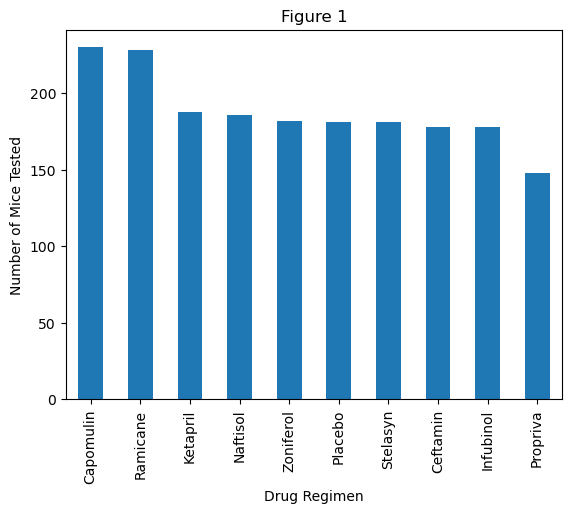

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_totals = cleaned_study_df.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending=False)

fig1 = plt.figure()
timepoints_totals.plot.bar()
plt.ylabel("Number of Mice Tested")
plt.title("Figure 1")
plt.show()

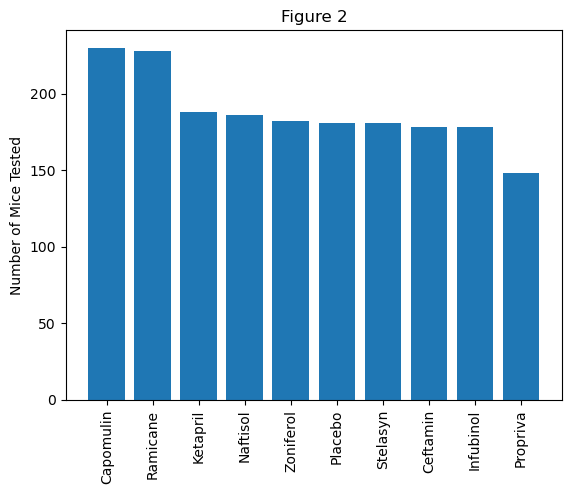

In [86]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

fig2 = plt.figure()
plt.bar(timepoints_totals.index, timepoints_totals)
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.title("Figure 2")
plt.show()


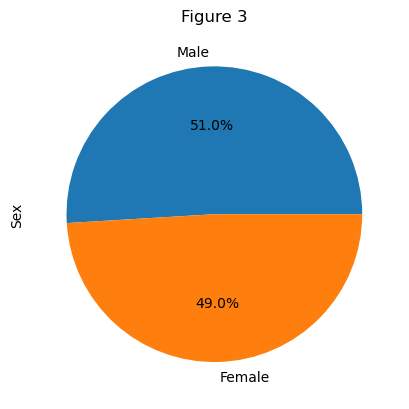

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = cleaned_study_df.groupby("Sex").count()["Mouse ID"].sort_values(ascending=False)

fig3 = plt.figure()
mouse_sex.plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Figure 3")
plt.show()

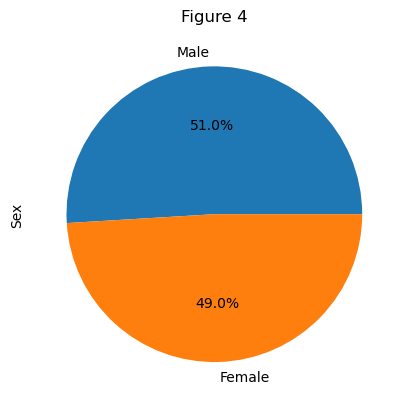

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig4 = plt.figure()
plt.pie(mouse_sex, labels=mouse_sex.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Figure 4")
plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints_df = cleaned_study_df.groupby("Mouse ID").max("Timepoint")["Timepoint"]
final_timepoints_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(final_timepoints_df, cleaned_study_df, on=["Mouse ID", "Timepoint"], how="inner")
#final_tumor_volume_df

# Select out only the four drug regimens of interest
final_tumor_volume_regimens_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(regimens_list)]
ftvr_df = final_tumor_volume_regimens_df #shortening this name for convenience, leaving long name in code for reference
ftvr_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
# I did this in the cell above with the variable 'regimens_list'

# Create empty list to fill with tumor vol data (for plotting)
drug_volumes_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimens_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_volumes = ftvr_df[ftvr_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    
    # add subset 
    drug_volumes_list.append(drug_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_volumes.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = []
    for volume in drug_volumes:
        if (volume > upper_bound) | (volume < lower_bound):
            outliers.append(volume)
    print(f"{drug}'s potential outliers : {outliers}")   

Capomulin's potential outliers : []
Ramicane's potential outliers : []
Infubinol's potential outliers : [36.3213458]
Ceftamin's potential outliers : []


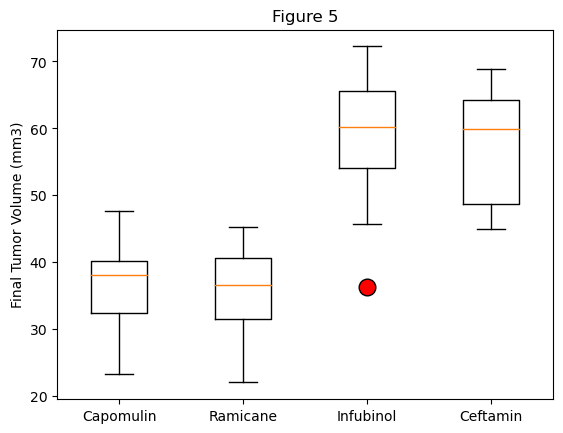

In [89]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig5 = plt.figure()
plt.boxplot(drug_volumes_list, labels=regimens_list, flierprops = {"markerfacecolor": "r", "markersize": 12})
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Figure 5")
plt.show()

## Line and Scatter Plots

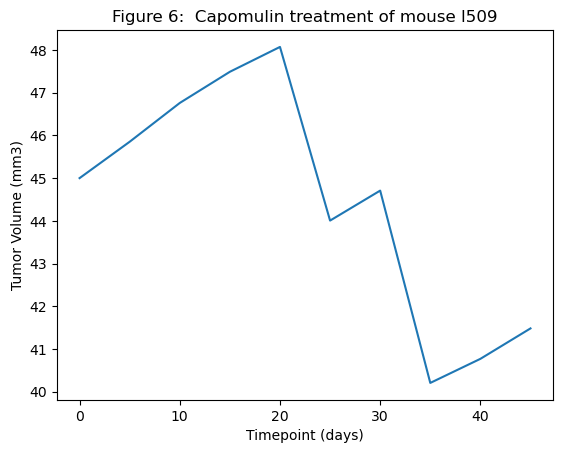

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Find this mouse in the data set, sort by Timepoint, then collect timepoint values
x_data_line = cleaned_study_df.loc[cleaned_study_df["Mouse ID"]=="l509"].sort_values("Timepoint", ascending=True)["Timepoint"]

# Find this mouse in the data set, sort by Timepoint, then collect tumor volumes
y_data_line = cleaned_study_df.loc[cleaned_study_df["Mouse ID"]=="l509"].sort_values("Timepoint", ascending=True)["Tumor Volume (mm3)"]

fig6 = plt.figure()
plt.plot(x_data_line, y_data_line)
plt.title("Figure 6:  Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

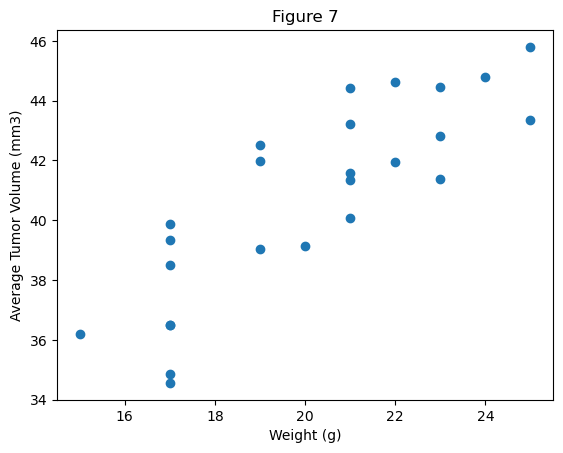

In [91]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Select out mice from the study who were treated with Capomulin
capomulin_mice_df = cleaned_study_df[cleaned_study_df["Drug Regimen"]=="Capomulin"]

# Get the weight for each mouse - the weights are listed several times but all identical, so the mean gives the value
x_data_scatter = capomulin_mice_df.groupby(by=["Mouse ID"]).mean(numeric_only=True)["Weight (g)"]

# Get the average tumor volume for each mouse
y_data_scatter = capomulin_mice_df.groupby(by=["Mouse ID"]).mean(numeric_only=True)["Tumor Volume (mm3)"]

fig7 = plt.figure()
plt.scatter(x_data_scatter, y_data_scatter)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Figure 7")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


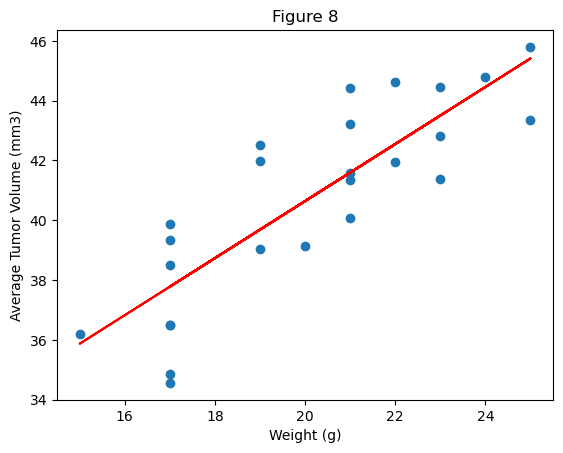

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data_scatter, y_data_scatter)
regress_values = x_data_scatter*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_coefficient = st.pearsonr(x_data_scatter, y_data_scatter)

fig8 = plt.figure()
plt.scatter(x_data_scatter,y_data_scatter)
plt.plot(x_data_scatter,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Figure 8")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0], 2)}")
plt.show()
